In [1]:
##The premise of this project is for the implementation a CNN with VGG-16 as a feature selector 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create an ImageGenerator object that is used to randomize and make certain small transformations to the image
#to build better and robust networks

from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              zoom_range=0.2,
                              shear_range=0.2,
                              fill_mode='nearest')

## Model:


In [4]:
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras import optimizers

In [5]:
model = vgg16.VGG16(weights='imagenet', include_top=False, 
                    input_shape=(150,150,3), pooling="max")

for layer in model.layers[:-5]:
        layer.trainable = False

for layer in model.layers:
    print(layer, layer.trainable)


transfer_model = Sequential()
for layer in model.layers:
    transfer_model.add(layer)
transfer_model.add(Dense(128, activation="relu"))  
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation="softmax")) 

adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)

transfer_model.compile(loss="categorical_crossentropy",
                      optimizer=adam,
                      metrics=["accuracy"])

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4a0a35bdd8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a09c60470> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a09c60fd0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4a083e0780> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a083e8828> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a083ee668> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4a083ee588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a083f8ac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a083fca58> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4a083fc0f0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4a08406390> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [6]:
transfer_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

In [7]:
train_directory = '/home/amoghavarsha/Project_CNN/my_project_env/Dataset/training/training'
validation_directory = '/home/amoghavarsha/Project_CNN/my_project_env/Dataset/validation/validation'

In [8]:
## Getting the training and the validation sets
batch_size = 16
train_gen = image_gen.flow_from_directory(train_directory,target_size=(150,150),batch_size=batch_size,
                                         class_mode='categorical')

Found 1098 images belonging to 10 classes.


In [9]:
validation_gen = image_gen.flow_from_directory(validation_directory,target_size=(150,150),batch_size=batch_size,
                                         class_mode='categorical')

Found 272 images belonging to 10 classes.


In [10]:
results = transfer_model.fit_generator(train_gen,epochs=30,steps_per_epoch=1097//batch_size,
                              validation_data=validation_gen,validation_steps=272//batch_size)

/home/amoghavarsha/Project_CNN/my_project_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
68/68 [==============================] - 165s 2s/step - loss: 2.4974 - accuracy: 0.1274 - val_loss: 1.7619 - val_accuracy: 0.5147
Epoch 2/30
68/68 [==============================] - 168s 2s/step - loss: 1.6735 - accuracy: 0.4356 - val_loss: 1.0746 - val_accuracy: 0.7463
Epoch 3/30
68/68 [==============================] - 159s 2s/step - loss: 1.1560 - accuracy: 0.6033 - val_loss: 0.8481 - val_accuracy: 0.7500
Epoch 4/30
68/68 [==============================] - 152s 2s/step - loss: 0.8084 - accuracy: 0.7313 - val_loss: 0.7492 - val_accuracy: 0.7500
Epoch 5/30
68/68 [==============================] - 151s 2s/step - loss: 0.5892 - accuracy: 0.7983 - val_loss: 0.6260 - val_accuracy: 0.8199
Epoch 6/30
68/68 [==============================] - 154s 2s/step - loss: 0.4025 - accuracy: 0.8705 - val_loss: 0.4992 - val_accuracy: 0.8493
Epoch 7/30
68/68 [==============================] - 156s 2s/step - loss: 0.3479 - accuracy: 0.8828 - val_loss: 0.5187 - val_accuracy: 0.8566
Epoch 8/30
68

Text(0.5, 1.0, 'Training Vs Validation')

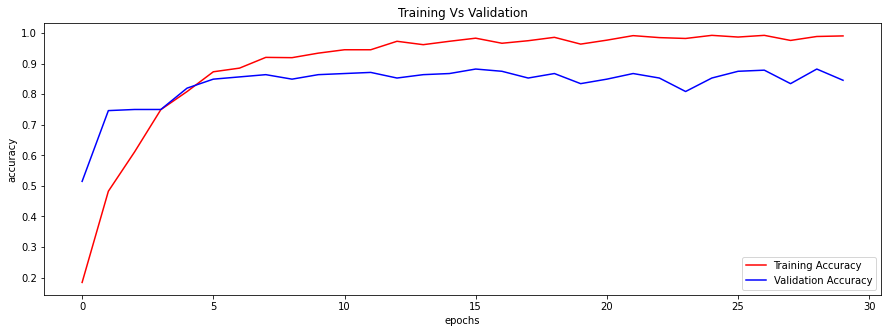

In [11]:
plt.figure(figsize=(15,5))
plt.plot(results.history['accuracy'],'r',label='Training Accuracy')
plt.plot(results.history['val_accuracy'],'b',label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Training Vs Validation')

Text(0.5, 1.0, 'Training Vs Validation')

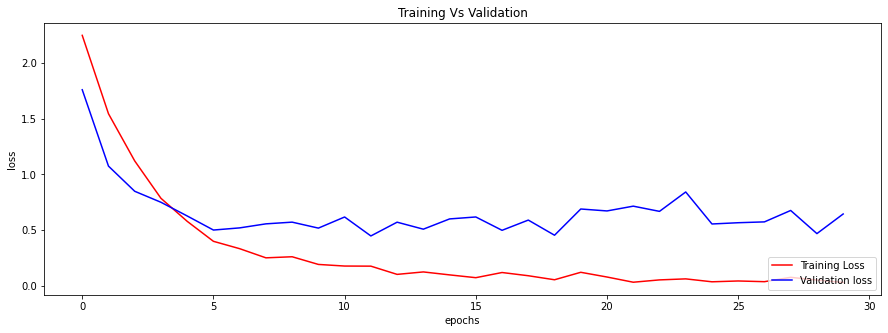

In [12]:
plt.figure(figsize=(15,5))
plt.plot(results.history['loss'],'r',label='Training Loss')
plt.plot(results.history['val_loss'],'b',label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.title('Training Vs Validation')

In [13]:
#transfer_model.save('TL_CNN_Monkey.h5')

In [14]:
_, acc = transfer_model.evaluate_generator(validation_gen, steps=272 //batch_size)

/home/amoghavarsha/Project_CNN/my_project_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [15]:
print('The testing accuracy for the CNN with the 10-Species-Monkey dataset is : %.3f' % (acc * 100.0))

The testing accuracy for the CNN with the 10-Species-Monkey dataset is : 86.765


In [ ]:
# from tensorflow import keras
# x = keras.models.load_model('TL_CNN_Monkey.h5')